## Exercici 1
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import string
from textblob import TextBlob
from nltk.metrics import *
from string import punctuation
import warnings
warnings.filterwarnings("ignore")

Prenem com a mostra 2 textes de noticies sobre el 4th of July de 2 mitjans, Fox News i de MSNBC en anglès, per veure si son neutrals en el seu llenguatge i si hi podem veure en la seva polaritat o un biaix. Comparant la mateixa noticia espero poder per veure si l'anàlisi de sentiment es diferent d'un tipus de noticia a una altre. Els he tret d'aquestes webs: 
https://www.foxnews.com/lifestyle/july-4-remember-blessing-living-most-free-prosperous-society-earth
https://www.msnbc.com/opinion/msnbc-opinion/freedom-under-attack-fourth-july-rcna92412


In [2]:
politicsFox="""On July 4, 'remember the blessing of living in the most free and prosperous society' on Earth
Faith leader, on Independence Day, reminds Americans that we do not worship 'a god called government'A man of faith is counting his blessings this July 4th — and sharing key reminders for all about the creation of our country. 
"The United States is unique in world history and its founding is the greatest of all human endeavors," Rabbi Pinchas Taylor of Plantation, Florida, told Fox News Digital in emailed comments.
"The formation of the United States is the pivotal event of the last four centuries — and no other national story has more profound lessons for both the American people and the rest of humanity," he said.
AMERICAN FLAGS FOR FAMILIES, FRIENDS AND NEIGHBORS ARE AT THE HEART OF THIS ENDEAVOR 
Rabbi Taylor, a father of seven, noted that "observers of all faiths — and of no faith — can discern signs of destiny’s direction in the formation of America."
Said Taylor, "While many nations progressively evolved into democratic societies over centuries, the United States was the first nation to be founded upon democracy."Taylor said that "scholars usually acknowledge the influence of the Hebrew Bible, ethical ideals and spiritual beliefs on American political tradition."
That includes, he said, "the belief in one God, that He demands righteousness, and that we are made in God's image."
JULY 4TH QUIZ! HOW WELL DO YOU KNOW YOUR FACTS ABOUT INDEPENDENCE DAY? 
Said Taylor, "Even those within the founding age who were less religiously devout looked to the Bible for understandings of human nature, civic virtue, social order, political authority and other ideas crucial to the foundation of a new political society."
Even those within the founding age who were less religiously devout looked to the Bible for understandings of human nature, civic virtue, social order" and more.
And "many people," he added, "felt that the political and legal structures found in Scripture, such as the separation of powers and the rule of law, enjoyed divine favor and should be imitated in modern democracies."
‘THE JEFFERSON BIBLE’ SPOTLIGHTS COMPLEX FAITH, REMARKABLE INTELLECT OF FOUNDING FATHER
Taylor said he finds it "fascinating" that the Declaration of Independence "refers to ‘all men being created equal’ as a ‘self-evident’ truth."
Said Taylor, "Most societies in most times have not subscribed to that. This is only ‘self-evident’ to those who would subscribe to the biblical idea that God created human beings equally in his image."
He added, "If they were not created equally, they certainly evolved unequally. There is no basis for democracy except grounded in belief about the divine origin of man."
Taylor said, "Thus, it was a Declaration of Independence from Britain, and a bold ‘Declaration of Dependence’ upon God. Likewise, as President John Adams famously noted, ‘Our Constitution was made only for a moral and religious people. It is wholly inadequate to the government of any other.’"
MEET THE AMERICAN WHO WROTE ‘AMERICA THE BEAUTIFUL,' KATHARINE LEE BATES, PROFESSOR-POET PRAYED FOR UNITY
Taylor pointed out that the United States has been a nation of faith from its earliest days.
"The early settlers viewed their emigration from England as a reenactment of the Israelites exodus from Egypt. The Kings of England were the pharaohs, and the Atlantic Ocean was the Red Sea taking them to America, their new promised land."
Said Taylor, "When the Continental Congress named the first committee to design a great seal, or national emblem, for the country, Benjamin Franklin and Thomas Jefferson chose an allegorical scene with Moses standing on the shore, extending his hand over the sea."
The rabbi also pointed that the Liberty Bell "is etched with a biblical verse. Throughout the following century, the art, symbols and literature in the fight for abolition were saturated with Moses’ symbolism and biblical texts like ‘Let my people go!’" 
Said Taylor, "The role of biblical values in America's founding is indisputable — and the success of the American experiment is undergirded by a worldview based in the Hebrew Bible."
He said that "strengthening our connection with the biblical values etched in the America’s history" will help all Americans "properly shape" our country's destiny.
"Both our Founding Fathers and the Hebrew Bible believed that morality comes from God — and income comes from personal decisions" the individual makes.  
Said Taylor, "Some today would like to push for the opposite, that income should come from the god called government." 
He added, "Both our Founding Fathers and the Hebrew Bible teach that respectful discussion helps us arrive at an essential truth, whereas some in contemporary America have already decided their truth, so there's no need for discussion."
"We are endowed by our Creator with certain unalienable rights and a divine mission."
Noted Rabbi Taylor, "Both the Founding Fathers and the Hebrew Bible believe that you are strong, capable and responsible for your own destiny — whereas some today would preach that you are weak and simply a victim of circumstance."
Taylor said, "This July 4th would be an ideal opportunity to remember the blessing that it is to live in the most free and prosperous society in the history of the world, to remember that we are endowed by our Creator with certain unalienable rights and a divine mission — and that we should embody the words of Abraham Lincoln that we are ‘an almost-chosen people’ in an ‘almost chosen land.’"
"""
print(politicsFox)

On July 4, 'remember the blessing of living in the most free and prosperous society' on Earth
Faith leader, on Independence Day, reminds Americans that we do not worship 'a god called government'A man of faith is counting his blessings this July 4th — and sharing key reminders for all about the creation of our country. 
"The United States is unique in world history and its founding is the greatest of all human endeavors," Rabbi Pinchas Taylor of Plantation, Florida, told Fox News Digital in emailed comments.
"The formation of the United States is the pivotal event of the last four centuries — and no other national story has more profound lessons for both the American people and the rest of humanity," he said.
AMERICAN FLAGS FOR FAMILIES, FRIENDS AND NEIGHBORS ARE AT THE HEART OF THIS ENDEAVOR 
Rabbi Taylor, a father of seven, noted that "observers of all faiths — and of no faith — can discern signs of destiny’s direction in the formation of America."
Said Taylor, "While many nations pr

In [3]:
politics = """Seeing the erosion of our freedoms makes it hard to celebrate this Fourth of July
The Supreme Court, conservative governors and gerrymandered state legislatures are racing to shrink our fundamental rights and freedoms
Despite the promises of America’s founding documents, on Independence Day 2023, justice, the “general welfare,” “equal protection of the laws” and “life, liberty and the pursuit of happiness” are all at risk. The Supreme Court, conservative governors and gerrymandered state legislatures are racing to shrink fundamental rights and freedoms, enabled and empowered by structural inequities built into the Constitution. The result is that tens of millions of Americans are being deprived of rights that other Americans have.
On Independence Day 2023, justice, the “general welfare,” “equal protection of the laws” and “life, liberty and the pursuit of happiness” are all at risk.
The scale of the disparity is frightening and growing, taking us ever further from America’s founding ideal that “all men are created equal” and its continuing journey toward equal rights for all.
The marquee setback came last year with the high court’s Dobbs decision, which erased a constitutional right that had been in place for nearly half a century. A year later, free to do as they pleased, 14 states fully banned abortion, and a 15th, Georgia, banned it after six weeks of pregnancy (before many women know they are pregnant). At the same time, 20 states where abortion is legal added protections over the past year.
While abortion is a particularly stark example of the democracy divide, U.S. courts and state legislatures are advancing inequality of rights in countless other ways: from last week’s Supreme Court decisions allowing a prospective wedding website designer to refuse services to hypothetical same-sex couples and removing race from the many factors colleges and universities use to assemble diverse student bodies to states’ trying to restrict and ban medical care for transgender people, discussions of gay issues in classrooms and which books can be accessed in libraries.
The solution in many cases is federal legislation, which would require, at minimum, Democrats to reclaim a House majority next year. The party would also have to elect 50 or more senators willing to abolish the filibuster, at least in cases when America’s most sacred promises are threatened.
Here are the inequities that divide the nation most egregiously on Independence Day and are most in need of congressional action:
Voting. Some states make it much harder to vote than others. Why is that allowed? Congress should enact a national law on ballot access and election protection. It already has a vehicle in the 2021 Freedom to Vote Act, based on a bill proposed by Sen. Joe Manchin, D-W.Va., which would make Election Day a holiday and set minimum standards for mail voting, early voting, drop boxes and voter ID and address partisan gerrymandering, voter roll purges, interference with election workers and other issues..
Republicans refused to buy in to the bill last year, and Manchin refused to abandon the Senate filibuster tradition, which requires 60 senators to advance a bill. But other Democrats could make resistance from Manchin and Kyrsten Sinema, I-Ariz., less relevant. Sen. John Fetterman, D-Pa., is a filibuster opponent, and some 2024 Democrats are running on a promise to end it.Abortion. Congress should codify Roe v. Wade, the 1973 Supreme Court decision that legalized abortion up to fetal viability. For decades, this ruling allowed doctors to deliver the best medical care possible. Now that abortion is a crime in so many states, doctors fear losing their licenses or going to prison, and the choice for women with doomed or dangerous pregnancies is to leave the state for treatment or wait until they are at death’s door, at which point doctors may decide it’s legal to end their pregnancies. Roe also accommodated many religious views about abortion, not just those of conservatives who insist on bans.
Sending the issue to the states guaranteed massive infringements on personal privacy and self-determination.
The First Amendment promotes respect for all religions (or no religion), but by overturning Roe, the Supreme Court freed states to violate that principle. (The court itself just last week violated that principle by blessing a Christian conservative’s desire to deny gay people service on religious grounds.)
Sending the issue to the states guaranteed massive infringements on personal privacy and self-determination, health risks for women and girls and vast gulfs in access. Why should women in Texas risk infertility, disability and death under the state’s bans while women in California (Americans just like them) have safe access to the full range of reproductive care? How is that equal protection?
We are even seeing attempts to ban interstate travel for abortion care and to make it harder to put abortion rights on the ballot for voters to decide directly. How is that freedom? A right so significant it was until recently a constitutional right should not be decided by state legislatures.
Reactions to Supreme Court's major blow to LGBTQ rights
Guns. As eagerly as the Supreme Court tossed abortion to the states a year ago, in its Bruen decision the same month, it ran roughshod over state regulation of guns. In that ruling, the court said regulations must be consistent with “history and tradition” from centuries ago. Federal judges of all political stripes are finding this unworkable, absurd, illogical and exclusionary (given that women and nonwhite people could not vote centuries ago), as well as disrespectful to the nation’s 18th-century founders."""
print(politics)

Seeing the erosion of our freedoms makes it hard to celebrate this Fourth of July
The Supreme Court, conservative governors and gerrymandered state legislatures are racing to shrink our fundamental rights and freedoms
Despite the promises of America’s founding documents, on Independence Day 2023, justice, the “general welfare,” “equal protection of the laws” and “life, liberty and the pursuit of happiness” are all at risk. The Supreme Court, conservative governors and gerrymandered state legislatures are racing to shrink fundamental rights and freedoms, enabled and empowered by structural inequities built into the Constitution. The result is that tens of millions of Americans are being deprived of rights that other Americans have.
On Independence Day 2023, justice, the “general welfare,” “equal protection of the laws” and “life, liberty and the pursuit of happiness” are all at risk.
The scale of the disparity is frightening and growing, taking us ever further from America’s founding id

### Preprocessat

In [4]:
tokenspolFox = word_tokenize(politicsFox)
tokenspol = word_tokenize(politics)
## Convertim tots els tokens de la llista en minúscules si son caractes alfabétics.
tokenspol = [token.lower() for token in tokenspol if token.isalpha()]
tokenspolFox = [token.lower() for token in tokenspolFox if token.isalpha()]


In [5]:
#Miro si son mostres similars amb la freqüencia de les paraules.
fdistpol = FreqDist(tokenspol) #Mirem la frequencia de les paraules a l'article de política de MSNBC
fdistpolFox = FreqDist(tokenspolFox)#Mirem la frequencia de les paraules a l'article de politica de Fox
print(fdistpol)
print(fdistpolFox)

<FreqDist with 411 samples and 898 outcomes>
<FreqDist with 382 samples and 889 outcomes>


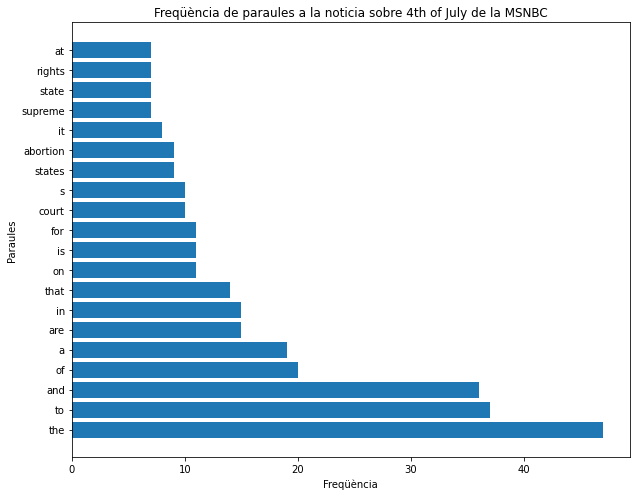

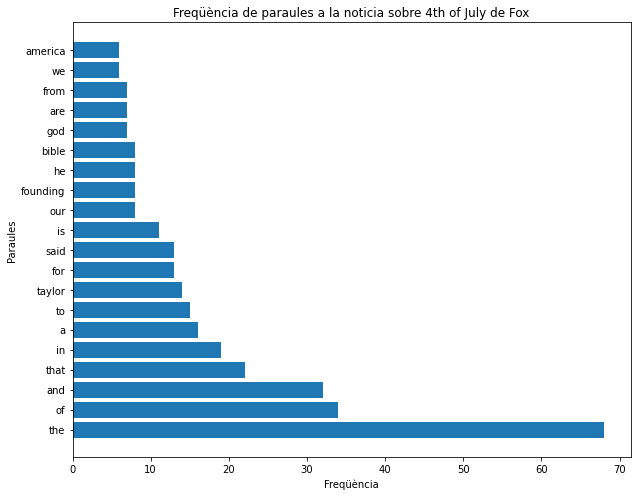

In [6]:
import matplotlib.pyplot as plt
# Grafiquem les 20 paraules mes frequents en l'article de la BBC
paraules_comuns = fdistpol.most_common(20)
words = [word[0] for word in paraules_comuns]
counts = [count[1] for count in paraules_comuns]
plt.figure(figsize=(10, 8))
plt.barh(words, counts)
plt.xlabel('Freqüència')
plt.ylabel('Paraules')
plt.title('Freqüència de paraules a la noticia sobre 4th of July de la MSNBC')
plt.show()
# Grafiquem les 20 paraules mes comuns en l'article de The Sun
paraules_comuns = fdistpolFox.most_common(20)
words = [word[0] for word in paraules_comuns]
counts = [count[1] for count in paraules_comuns]
plt.figure(figsize=(10, 8))
plt.barh(words, counts)
plt.xlabel('Freqüència')
plt.ylabel('Paraules')
plt.title('Freqüència de paraules a la noticia sobre 4th of July de Fox')
plt.show()

## Exercici 2
Treu les stopwords i realitza stemming al teu conjunt de dades.

In [7]:
#Treiem les stop_words i fem  un texte sense les stopwords en anglès 
stop_words = set(stopwords.words('english'))
tokens_sense_stopwordspol = [token for token in tokenspol if token not in stop_words]
tokens_sense_stopwordspolFox = [token for token in tokenspolFox if token not in stop_words]

In [8]:
#Reduim les paraules/tokens a la seva base o forma en el diccionari
lemmatizer = WordNetLemmatizer()
tokens_lemmapol = [lemmatizer.lemmatize(token) for token in tokens_sense_stopwordspol]
tokens_lemmapolFox = [lemmatizer.lemmatize(token) for token in tokens_sense_stopwordspolFox]

In [9]:
#Reduim les paraules/tokens que queden a la seva arrel 
ps = PorterStemmer()
tokens_stemmingpol = [ps.stem(token) for token in tokens_lemmapol]
tokens_stemmingpolFox = [ps.stem(token) for token in tokens_lemmapolFox]

In [10]:
fdist_stemmingpol = FreqDist(tokens_stemmingpol) #Mirem la frequencia de les paraules a l'article de política de la BBC
fdist_stemmingpolFox = FreqDist(tokens_stemmingpolFox) #Mirem la frequencia de les paraules a l'article de politic

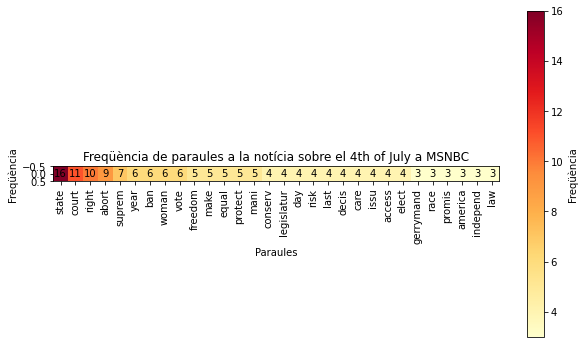

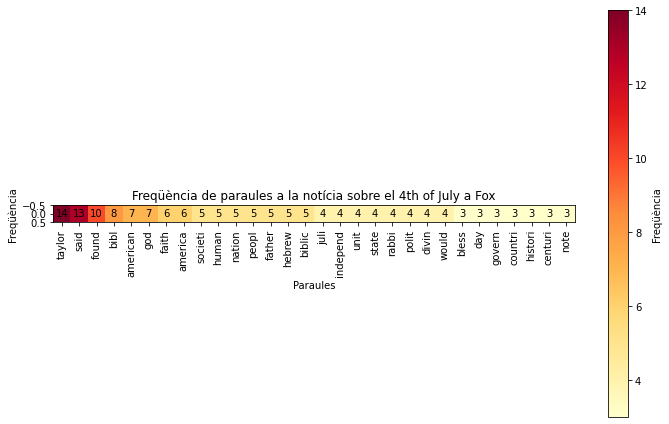

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Politics heatmap
words_pol = [word for word, freq in fdist_stemmingpol.most_common(30)]
frequencies_pol = np.array([freq for word, freq in fdist_stemmingpol.most_common(30)]).reshape(1, -1)
fig, ax = plt.subplots(figsize=(10, 6))
heatmap_pol = ax.imshow(frequencies_pol, cmap='YlOrRd')
ax.set_xticks(np.arange(len(words_pol)))
ax.set_xticklabels(words_pol, rotation=90)
for i in range(len(words_pol)):
    ax.text(i, 0, frequencies_pol[0][i], ha='center', va='center', color='black')
ax.set_title('Freqüència de paraules a la notícia sobre el 4th of July a MSNBC')
ax.set_xlabel('Paraules')
ax.set_ylabel('Freqüència')
cbar_pol = plt.colorbar(heatmap_pol)
cbar_pol.set_label('Freqüència')

# Entertainment heatmap
words_ent = [word for word, freq in fdist_stemmingpolFox.most_common(30)]
frequencies_ent = np.array([freq for word, freq in fdist_stemmingpolFox.most_common(30)]).reshape(1, -1)
fig, ax = plt.subplots(figsize=(10, 6))
heatmap_ent = ax.imshow(frequencies_ent, cmap='YlOrRd')
ax.set_xticks(np.arange(len(words_ent)))
ax.set_xticklabels(words_ent, rotation=90)
for i in range(len(words_ent)):
    ax.text(i, 0, frequencies_ent[0][i], ha='center', va='center', color='black')
ax.set_title('Freqüència de paraules a la notícia sobre el 4th of July a Fox')
ax.set_xlabel('Paraules')
ax.set_ylabel('Freqüència')
cbar_ent = plt.colorbar(heatmap_ent)
cbar_ent.set_label('Freqüència')

plt.tight_layout()
plt.show()

- Amb les paraules mes freqüents podem veure que l'article de FOX lliga molt el 4th of July amb religió (bible, god,faith, biblic, etc)) la qual cosa ens pot indicar un biaix
- Alhora l'article de MSNBC lliga el 4th of July amb les darreres noticies sobre el abort, el suprem, les dones i la llibertat...que també indica un biaix polític. 
- Mirem a continuació la diversitat Lexica, (A lower lexical diversity can indicate a more one-sided perspective.)Amb el rati de paraules uniques utilitzades.

In [38]:
token_count = len(tokens_sense_stopwordspol)
token_countFox = len(tokens_sense_stopwordspolFox)
unique_words = set(tokens_sense_stopwordspol) 
unique_wordsFox = set(tokens_sense_stopwordspolFox)  
type_count = len(unique_words)
type_countFox = len(unique_wordsFox)
ttr = type_count / token_count
ttrFox = type_countFox / token_countFox
print(f"The type-token ratio is: {ttr}")
print(f"The type-token ratio for Fox is: {ttrFox}")

The type-token ratio is: 0.657088122605364
The type-token ratio for Fox is: 0.6402439024390244


 ## Exercici 3
Realitza sentiment analysis al teu conjunt de dades.

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sentimentpol = sia.polarity_scores(politics)
sentimentpolFox = sia.polarity_scores(politicsFox)
print("L'article de politica de la MSNBC presenta la seguents caracteristiques:",sentimentpol)
print("L'article de politica de Fox presenta la seguents caracteristiques:",sentimentpolFox)

L'article de politica de la MSNBC presenta la seguents caracteristiques: {'neg': 0.086, 'neu': 0.79, 'pos': 0.124, 'compound': 0.9903}
L'article de politica de Fox presenta la seguents caracteristiques: {'neg': 0.024, 'neu': 0.787, 'pos': 0.189, 'compound': 0.9994}


--- Basant-nos en les característiques a cada article de política, podem treure les següents conclusions: 
- **L'article de política de la MSNBC** té un sentiment predominantment neutre (0.791), amb una petita quantitat de contingut negatiu (0.086) i petita quantitat també de positiu (0.123). El valor de "compound" (0.9903) indica que en conjunt, l'article té una orientació positiva.

- **L'article de política de Fox** també té un sentiment predominantment neutre (0.787), amb una quantitat lleugerament menor de contingut negatiu (0.024) i mes contingut positiu que l'altre article (0.189). El valor de "compound" (0.9994) indica que en conjunt, l'article té una orientació positiva una mica més gran a l'article de la MSNBC.

Aquests resultats ens indiquen que tant l'article de la BBC com l'article del Sun tenen un to neutre en general, però FOX te un contingut mes positiu sobre el dia de la independencia, 4th of July

Amb TextBlob podem mirar també la polaritat del sentiments i la subjetivitat dels articles:
**polaritat** es un nombre entre [-1.0 i el 1.0] on 0 indica neutral, +1 indica un sentiment molt positiu i -1 representa sentiment molt negatiu.
**subjetivitat** es un nombre entre el 0 (molt objectiu) i el 1(molt subjectiu) "Subjective sentence expresses some personal feelings, views, beliefs, opinions, allegations, desires, beliefs, suspicions, and speculations where as Objective sentences are factual."

In [13]:
from textblob import TextBlob

# Create TextBlob objects
textblob_pol = TextBlob(" ".join(tokens_stemmingpol))
textblob_polFox = TextBlob(" ".join(tokens_stemmingpolFox))

# Get the subjectivity and polarity
subjectivity_pol = textblob_pol.subjectivity
polarity_pol = textblob_pol.polarity

subjectivity_polFox = textblob_polFox.subjectivity
polarity_polFox = textblob_polFox.polarity

print("Subjectivitat del article de 4th July de la MSNBC (stemmed):", subjectivity_pol)
print("Polaritat del article de 4th July de la MSNBC (stemmed):", polarity_pol)

print("Subjectivitat del article de 4th July de FOX (stemmed):", subjectivity_polFox)
print("Polaritat del article de 4th July de FOX (stemmed):", polarity_polFox)


Subjectivitat del article de 4th July de la MSNBC (stemmed): 0.3925761124121779
Polaritat del article de 4th July de la MSNBC (stemmed): 0.14386026541764252
Subjectivitat del article de 4th July de FOX (stemmed): 0.40028383566119413
Polaritat del article de 4th July de FOX (stemmed): 0.1370211549456833


Els articles de MSNBC i FOX del 4 de juliol mostren un nivell moderat de subjectivitat. Les puntuacions de polaritat indiquen sentiments lleugerament positius per als dos articles, amb l'article de MSNBC inclinat més cap a la positivitat i l'article de FOX també amb un sentiment positiu, però en una mesura una mica menor.

Per tant amb aquestes dades Tant amb TextBlob com en SentimentIntensityAnalyzer no ens donava massa diferències.
Es podria fer per exemple  un bucle i analitzar tots els articles d'una determinada noticia en diferents mitjans i trobar els articles mes objectius.

In [36]:
# També podem mirar la similaritat dels 2 articles amb Jaccard:
from nltk import jaccard_distance
# També podem mirar la similaritat dels 2 articles amb Jaccard:
def compare_similarity(text1, text2):
    jaccard_sim = jaccard_distance(set(tokens_stemmingpol), set(tokens_stemmingpolFox))
    return 1 - jaccard_sim

print(f"La puntuació de similaritat és: {similarity_score}")

La puntuació de similaritat és: 0.11886792452830186


La puntuació de similaritat de jaccard va de 0 a 1. Per tant aquesta puntuació suggereix molt poca similaritat entre els dos articles d'una mateixa noticia. Això significa una polarització de la noticia, que els articles representen diferents perspectives en un mateix fet.
La polarització en la cobertura informativa fa referència a la divergència de punts de vista i la presentació de la informació d'una manera que s'alinea amb una posició ideològica o partidista específica.

- #### Fem un anàlisi per frases per veure si canvia el resultat:

In [17]:
# Separem el texte en frases
lower_politics=politics.lower()
frases = nltk.sent_tokenize(lower_politics)
frases_data = pd.DataFrame({'Frases MSNBC': frases})

In [19]:
import re
# Definim funció per netejar el texte
def clean(text):
# Treu tots els caracters especials i numerics deixan els alfabetics 
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text
#Afegim columna
frases_data['Frases_netes MSNBC'] = frases_data['Frases MSNBC'].apply(clean)
frases_data.head()


,Frases MSNBC,Frases_netes MSNBC
0,seeing the erosion of our freedoms makes it ha...,seeing the erosion of our freedoms makes it ha...
1,"the supreme court, conservative governors and ...",the supreme court conservative governors and g...
2,the result is that tens of millions of america...,the result is that tens of millions of america...
3,"on independence day 2023, justice, the “genera...",on independence day justice the general welfar...
4,the scale of the disparity is frightening and ...,the scale of the disparity is frightening and ...


In [20]:
# Importem el dictionari
from nltk.corpus import wordnet
from nltk.tag import pos_tag
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

frases_data['etiquetes POS MSNBC'] = frases_data['Frases_netes MSNBC'].apply(token_stop_pos)
frases_data.head()

,Frases MSNBC,Frases_netes MSNBC,etiquetes POS MSNBC
0,seeing the erosion of our freedoms makes it ha...,seeing the erosion of our freedoms makes it ha...,"[(seeing, v), (erosion, n), (freedoms, n), (ma..."
1,"the supreme court, conservative governors and ...",the supreme court conservative governors and g...,"[(supreme, a), (court, n), (conservative, a), ..."
2,the result is that tens of millions of america...,the result is that tens of millions of america...,"[(result, n), (tens, n), (millions, n), (ameri..."
3,"on independence day 2023, justice, the “genera...",on independence day justice the general welfar...,"[(independence, n), (day, n), (justice, v), (g..."
4,the scale of the disparity is frightening and ...,the scale of the disparity is frightening and ...,"[(scale, n), (disparity, n), (frightening, v),..."


In [21]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

frases_data['Lemma MSNBC'] = frases_data['etiquetes POS MSNBC'].apply(lemmatize)
frases_data.head()

,Frases MSNBC,Frases_netes MSNBC,etiquetes POS MSNBC,Lemma MSNBC
0,seeing the erosion of our freedoms makes it ha...,seeing the erosion of our freedoms makes it ha...,"[(seeing, v), (erosion, n), (freedoms, n), (ma...",see erosion freedom make hard celebrate four...
1,"the supreme court, conservative governors and ...",the supreme court conservative governors and g...,"[(supreme, a), (court, n), (conservative, a), ...",supreme court conservative governor gerryman...
2,the result is that tens of millions of america...,the result is that tens of millions of america...,"[(result, n), (tens, n), (millions, n), (ameri...",result ten million american deprive right am...
3,"on independence day 2023, justice, the “genera...",on independence day justice the general welfar...,"[(independence, n), (day, n), (justice, v), (g...",independence day justice general welfare equ...
4,the scale of the disparity is frightening and ...,the scale of the disparity is frightening and ...,"[(scale, n), (disparity, n), (frightening, v),...",scale disparity frighten grow take us ever a...


In [22]:
from textblob import TextBlob

def getPolarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def getSubjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity

frases_data['Polarity'] = frases_data['Lemma MSNBC'].apply(getPolarity)
frases_data['Subjectivity'] = frases_data['Lemma MSNBC'].apply(getSubjectivity)

frases_data.head()


,Frases MSNBC,Frases_netes MSNBC,etiquetes POS MSNBC,Lemma MSNBC,Polarity,Subjectivity
0,seeing the erosion of our freedoms makes it ha...,seeing the erosion of our freedoms makes it ha...,"[(seeing, v), (erosion, n), (freedoms, n), (ma...",see erosion freedom make hard celebrate four...,0.124008,0.337897
1,"the supreme court, conservative governors and ...",the supreme court conservative governors and g...,"[(supreme, a), (court, n), (conservative, a), ...",supreme court conservative governor gerryman...,0.285714,0.535714
2,the result is that tens of millions of america...,the result is that tens of millions of america...,"[(result, n), (tens, n), (millions, n), (ameri...",result ten million american deprive right am...,0.071429,0.133929
3,"on independence day 2023, justice, the “genera...",on independence day justice the general welfar...,"[(independence, n), (day, n), (justice, v), (g...",independence day justice general welfare equ...,0.250000,0.316667
4,the scale of the disparity is frightening and ...,the scale of the disparity is frightening and ...,"[(scale, n), (disparity, n), (frightening, v),...",scale disparity frighten grow take us ever a...,0.296429,0.508929


In [23]:
frases_data.describe()

,Polarity,Subjectivity
count,35.000000,35.000000
mean,0.101289,0.346937
std,0.159275,0.218583
min,-0.291667,0.000000
25%,0.000000,0.225000
50%,0.100000,0.350000
75%,0.250000,0.525595
max,0.333333,0.766667


In [24]:
#Fem el mateix per Fox:
lower_politicsFox=politicsFox.lower()
frasesFox = nltk.sent_tokenize(lower_politicsFox)
frases_dataFox = pd.DataFrame({'Frases FOX': frasesFox})
# Cleaning the text in the review column
frases_dataFox['Frases_netes FOX'] = frases_dataFox['Frases FOX'].apply(clean)
frases_dataFox['etiquetes POS FOX'] = frases_dataFox['Frases_netes FOX'].apply(token_stop_pos)
frases_dataFox['Lemma FOX'] = frases_dataFox['etiquetes POS FOX'].apply(lemmatize)
frases_dataFox['Polarity'] = frases_dataFox['Lemma FOX'].apply(getPolarity)
frases_dataFox['Subjectivity'] = frases_dataFox['Lemma FOX'].apply(getSubjectivity)
frases_dataFox.head()

,Frases FOX,Frases_netes FOX,etiquetes POS FOX,Lemma FOX,Polarity,Subjectivity
0,"on july 4, 'remember the blessing of living in...",on july remember the blessing of living in the...,"[(july, n), (remember, v), (blessing, n), (liv...",july remember blessing living free prosperou...,0.133333,0.600000
1,"""the united states is unique in world history ...",the united states is unique in world history ...,"[(united, a), (states, n), (unique, a), (world...",united state unique world history founding g...,0.293750,0.462500
2,"""the formation of the united states is the piv...",the formation of the united states is the piv...,"[(formation, n), (united, a), (states, n), (pi...",formation united state pivotal event last fo...,0.145833,0.466667
3,"american flags for families, friends and neigh...",american flags for families friends and neighb...,"[(american, a), (flags, n), (families, n), (fr...",american flag family friend neighbor heart e...,0.000000,0.000000
4,"said taylor, ""while many nations progressively...",said taylor while many nations progressively e...,"[(said, v), (taylor, n), (many, a), (nations, ...",say taylor many nation progressively evolve ...,0.375000,0.416667


In [25]:
frases_dataFox.describe()

,Polarity,Subjectivity
count,32.000000,32.000000
mean,0.128446,0.300767
std,0.152727,0.225661
min,-0.125000,0.000000
25%,0.000000,0.037500
50%,0.091667,0.333611
75%,0.229167,0.467917
max,0.525000,0.681429


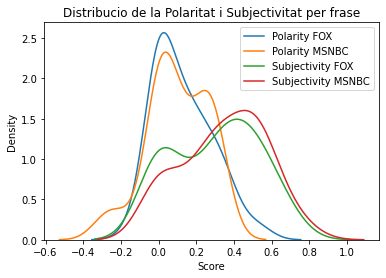

In [31]:
# Grafiquem la distribució de la Polaritat i subjectivitat de les frases als 2 articles:
#  Polarity
sns.distplot(frases_dataFox['Polarity'], hist=False, kde=True, label='Polarity FOX')
sns.distplot(frases_data['Polarity'], hist=False, kde=True, label='Polarity MSNBC')
# Subjectivity
sns.distplot(frases_dataFox['Subjectivity'], hist=False, kde=True, label='Subjectivity FOX')
sns.distplot(frases_data['Subjectivity'], hist=False, kde=True, label='Subjectivity MSNBC')
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Distribucio de la Polaritat i Subjectivitat per frase')
plt.legend()
plt.show()


## Conclusions

- Mirant els resultats per frases, podem concloure que tot i que FOX te frases amb màxims mes elevats de polaritat. 
Els dos articles tenen una subjectivitat i polaritat similar.
- Son dos articles molt diferents amb gairebé gens de similitut per una mateixa noticia com demostra similarity_score, donant 2 visions totalment oposa
i d'espectres polítics totalment diferents.
- Els dos articles, però donen un sentiment neutre i tenen una puntació també similar de positivitat i negativitat.
Sembla evident que tractant-se de la festivitat del 4 de Juliol, no hauria per què haver un biaix en la informació 
- Amb les uniques 2 proves que podem identificar un biax de la informació es amb el quoficient de Jaccard de similitut i mirant la
frequencia de la tipologia de paraules utilitzades. 


